<font face="B Mitra" size=4>
<div dir=rtl align=center>

<br>
<img src="https://aut.ac.ir/templates/tmpl_modern01/images/logo_fa.png" alt="Amirkabir University Logo" width="100">

<br>
<font size=2>
<b>دانشگاه صنعتی امیرکبیر - دانشکده ریاضی و علوم کامپیوتر</b>
</font>

<br>
<font size=6>
<b>مقدمه‌ای بر پردازش تصویر</b>
</font>

<br>
<hr/>
<font size=6>
<b>کارگاه چهارم </b>
</font>

<br>
استاد: دکتر مصطفی شمسی

<br>
طراح:‌ ثمین اسدی

<hr>
</div>
</font>



<font face="B Mitra" size=5>
<div dir=rtl>
کتابخانه های پیشنهادی:
<hr>

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import turtle

<font face="B Mitra" size=5>
<div dir=rtl>

<br>
<p align="justify">
<font size=6>
<h2>Region Grwoing</h2>
<font size=4>
</font>
<p>
region growing یک روش تقسیم بندی بسیار محبوب است. از مراحل زیر تشکیل شده است:

(1)
انتخاب یک دانه، یعنی یک پیکسل اولیه. این مرحله به دو صورت قابل انجام است:

   - به صورت تعاملی (کاربر دانه را انتخاب می کند)

     
    

   -  به طور خودکار: دانه به طور تصادفی انتخاب می شود

(2) یک معیار شباهت بین دو پیکسل انتخاب کنید.

    
(3) پیکسل‌های مشابه همسایه‌اش را جمع کنید، و در نتیجه اولین ناحیه R1 ایجاد می‌شود.

    
(4)  یک معیار شباهت بین یک پیکسل و یک منطقه انتخاب کنید.

   
(5)  پیکسل‌های مشابه همسایه‌اش (یعنی متعلق به مرز خارجی آن) را در R1 جمع کنید، که منجر به ایجاد یک منطقه R2⊃R1 می‌شود.

   
(6) این فرآیند را تا زمانی ادامه دهید که پیکسل های بیشتری نتوانند جمع شوند.

   
</p>
<hr>

<hr>
<font face="B Mitra" size=5>
<div dir=rtl>

<font size=6>
<b>تمرین اول</b>
</font>

<br>
<p align="justify">
<font size=4>
<p>  در این تمرین قصد داریم عملیات بخش بندی تصویر را با استفاده از region growing (که پیش‌تر توضیح داده شد) پیاده سازی کنیم. بدین منظور قصد داریم ماده سفید مغز و ماده خاکستری مغز را از پس زمینه جدا کنیم        </p>

</p>

<p>
<font size=4>

</font>
</p>

</div>
</font>

<font face="B Mitra" size=5>
<div dir=rtl>

<br>
<p align="justify">
<font size=4>

<font size=4>
</font>
<p>
1.1 تصویر Color_MRI.png را بخوانید(در فایل زیپ) و به طیف خاکستری ببرید.
</p>



<font size=4>

<p>
۲.۱ دو نقطه به عنوان دانه، یکی در قسمت ماده سفید مغز و دیگری در قسمت ماده خاکستری مغز انتخاب کنید. یک تصویر خالی با ابعاد تصویر خاکستری خوانده شده تعریف کنید و نقاط دانه را روی آن با مقادیر مختلف مشخص کنید.
</p>
</font>


<font size=4>

<p>
۳.۱ تابع region growing را به گونه ای تعریف کنید که دو تا از ورودی هایش " مقدار اختلاف از سطح آستانه " و دیگری رشته ای  که نشان دهنده  
" نوع محاسبه سطح آستانه " باشد. برای نوع محاسبه سطح آستانه  یکی از دو مدل زیر انتخاب کنید.

الف)ثابت: سطح آستانه در تمام تکرا رها یکسان و برابر مقدار شدت در نقطه دانه  میباشد.


ب) متغیر: سطح آستانه در هر تکرار مجددا محاسبه می شود که برابر است با میانگین شدتهای تمام نقاط
درون بخش
</p>


<font size=4>

<p>
  ۴.۱ با کرنل + الگوریتم region growing را روی تصویر خالی اعمال کنید.
تابع region growing را با نوع سطح آستانه ای که انتخاب کردید، به تعدادی روی تصویر اعمال کنید تا پیکسلهای هر بخش را بخش بندی کند.
</p>


<font size=4>
<p>





<p font="Mitra">
</p>
۵.۱ تعداد دفعات تکرار را محاسبه و چاپ کنید. تصویر اصلی و تصویر بخشبندی شده را به صورت استاندارد نمایش دهید و تحلیل کنید.
</p>
</b>

</div>
</font>


<hr>

</div>
</font>

<font face="B Mitra" size=4>
<div dir=rtl>
<p>
<h2> روند حل مسئله </h2>

در ابتدا دو نقطه را به صورت چشمی یکی از ناحیه سفید و دیگری از ناحیه خاکستری به عنوان دانه انتخاب کنید.

برای نمایش این دو نقطه بدلیل اینکه بسیار ریز هستند باید با کمک تابع cv.circle دایره ای اطراف آنها با شدت برابر با همان نقاط نمایش دهید.

نمونه کدی برای تعریف تابع region growing  در زیر آمده است که میتوانید از آن استفاده کنید.

کافی است برای دستیابی به خروجی تابع region growing را فراخوانی کرده و ورودی های مناسب به آن بدهید و در نهایت خروجی های مورد نظر را نمایش دهید و مقادیر step برای هرکدام از ناحیه سفید و ناحیه خاکستری را چاپ کنید.
</div>
</font>

<font face="B Mitra" size=4>
<div dir=rtl>
<p>
<b>
<h2> توضیح عملکرد تابع (سلول پایین)</h2>
</b>
ابعاد تصویر با استفاده از img.shape استخراج شده و در متغیرهای ارتفاع و وزن ذخیره می شود.

آرایه ای به نام seedMark با همان سایز تصویر ورودی ایجاد می شود و با صفر پر می شود. این آرایه برای علامت گذاری پیکسل های متعلق به منطقه تقسیم شده استفاده می شود.

یک لیست خالی به نام seedList برای ذخیره نقاط بذر برای منطقه در حال رشد مقداردهی اولیه می شود.

یک لیست خالی به نام seedList برای ذخیره نقاط seed برای منطقه در حال رشد مقداردهی اولیه می شود.
متغیرها seeds_grayscale، steps, main_grayscale، و seeds_avg_grayscale به مقادیر مناسب، مشابه توضیحات قبلی مقداردهی اولیه می شوند.

یک حلقه برای تکرار روی هر نقطه در لیست دانه ها استفاده می شود. نقاط دانه به seedList اضافه می شوند و مقادیر خاکستری مربوطه از تصویر ورودی به لیست seeds_grayscale اضافه می شوند.

میانگین مقدار خاکستری نقاط بذر با استفاده از np.average(seeds_greyscale) و inseeds_avg_grayscale ذخیره شده محاسبه می شود.

لیست connect  با مختصات نسبی تعریف شده است که نشان دهنده پیکسل های همسایه (بالا، راست، پایین، چپ) مورد استفاده برای اتصال در فرآیند رشد منطقه است.

از حلقه while برای تکرار استفاده می شود تا زمانی که هیچ seed ای در seedList باقی نماند. این حلقه هر seed را پردازش می کند. در داخل حلقه، اولین Seed Point از seedList با استفاده از seedList.pop(0) حذف شده و در currentPoint ذخیره می شود.

اگر diffType "میانگین" باشد، مقدار مقیاس خاکستری فعلی Point از img استخراج می شود و به seeds_grayscale اضافه می شود. سپس، مقدار متوسط ​​مقیاس خاکستری با استفاده از np.average (seeds_grayscale) مجدداً محاسبه می‌شود و در seeds_avg_grayscale ذخیره می‌شود. در نهایت، به پیکسل مربوطه در seedMark مقدار برچسب اختصاص داده می شود تا آن را به عنوان بخشی از منطقه تقسیم شده علامت گذاری کند.

اگر diffType "ثابت" باشد، میانگین مقیاس خاکستری با استفاده از main_grayscale (متوسط ​​محاسبه شده قبلی) محاسبه می شود و در seeds_avg_grayscale ذخیره می شود. به پیکسل مربوطه در seedMark مقدار برچسب اختصاص داده می شود.

حلقه for برای تکرار بر روی چهار مختصات همسایه (بالا، راست، پایین، چپ) تعریف شده در لیست اتصالات استفاده می شود.

در داخل حلقه for، متغیرهای موقت tmpX و tmpY با اضافه کردن مختصات همسایه فعلی به currentPoint محاسبه می‌شوند.

اگر مختصات موقت tmpX یا tmpY خارج از مرزهای تصویر باشند، حلقه به تکرار بعدی ادامه میدهد.

تفاوت مطلق بین مقدار مقیاس خاکستری پیکسل موقت در img و seeds_avg_grayscale محاسبه و در grayDiff ذخیره می شود.

اگر grayDiff کوچکتر از  آستانه باشد و پیکسل مربوطه در seedMark قبلاً برچسب گذاری نشده باشد (seedMark[tmpX,tmpY] == 0)، به پیکسل موقت مقدار برچسب در seedMark اختصاص داده می شود. علاوه بر این، پیکسل موقت برای رشد بیشتر منطقه به seedList اضافه می شود.

متغیر step برای پیگیری تعداد گام های برداشته شده در روند رشد منطقه افزایش می یابد.



</div>
</font>

In [8]:
def region_growing(img, seeds, thresh, diffType,label):
    height, weight = img.shape
    seedMark = np.zeros(img.shape)
    seedList = []
    steps = 1
    seeds_grayscale = []
    main_grayscale=seeds_grayscale
    seeds_avg_grayscale = 0


    for seed in seeds:
        seedList.append(seed)
        seeds_grayscale.append(img[seed[0], seed[1]])

    seeds_avg_grayscale = np.average(seeds_grayscale)

    connects = [ (0, -1), (1, 0),(0, 1), (-1, 0)]

    while(len(seedList)>0):
        currentPoint = seedList.pop(0)

        if (diffType == "average"):
            seeds_grayscale.append(img[currentPoint[0], currentPoint[1]])
            seeds_avg_grayscale = np.average(seeds_grayscale)
            seedMark[currentPoint[0], currentPoint[1]] = label

        if(diffType=="constant"):
            seeds_avg_grayscale =np.average(main_grayscale)
            seedMark[currentPoint[0], currentPoint[1]] = label

        for i in range(4):
            tmpX = currentPoint[0] + connects[i][0]
            tmpY = currentPoint[1] + connects[i][1]
            if tmpX < 0 or tmpY < 0 or tmpX >= height or tmpY >= weight:
                continue

            grayDiff = abs (img[tmpX, tmpY] - seeds_avg_grayscale)

            if grayDiff < thresh and seedMark[tmpX,tmpY] == 0:
                seedMark[tmpX,tmpY] = label
                seedList.append((tmpX,tmpY))

        steps +=1

    return seedMark, steps

به این تابع برای برگرداندن

seedMarks and steps

خط آخر اضافه شده است.

<hr>
<div dir=rtl>

<h3><font face="B Mitra" size=5><b>خروجی مورد انتظار:</b></font></h3>

<font face="B Mitra" size=4>
خروجی مورد انتظار را می‌توانید در تصویر زیر مشاهده بکنید.
</font>

<img src="https://i.ibb.co/Rz37Mrr/output.png"  width="80%"/>

<div dir=rtl>
<font face="B Mitra" size=6>
لینک‌های مفید
</font>
<ul>
<li><a href="https://sbme-tutorials.github.io/2019/cv/notes/6_week6.html">Region Growing چگونه کار می‌کند</a></li>
</ul>
</div>


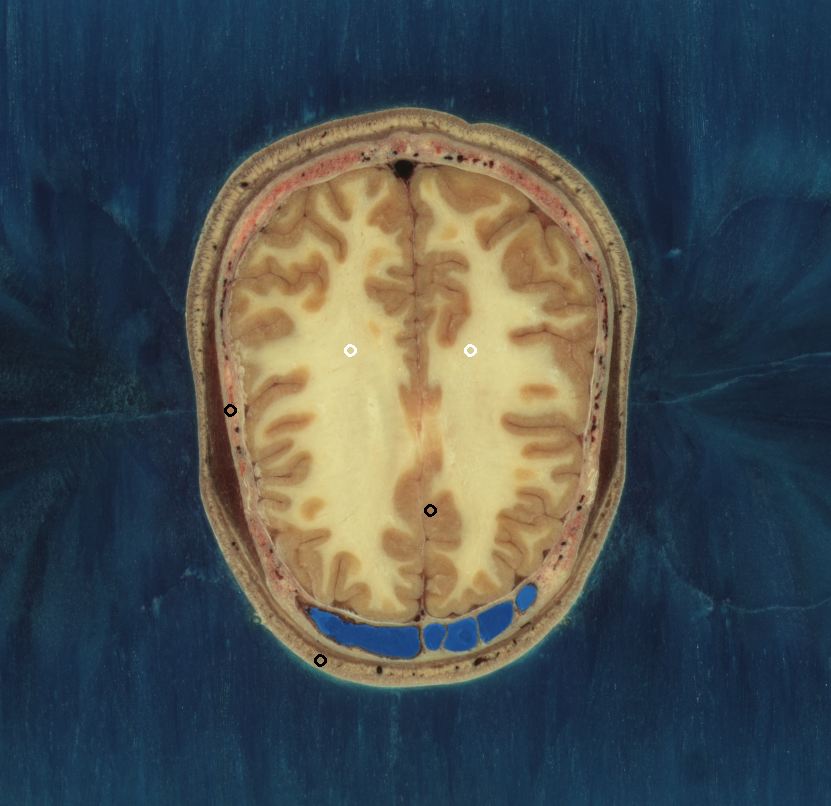

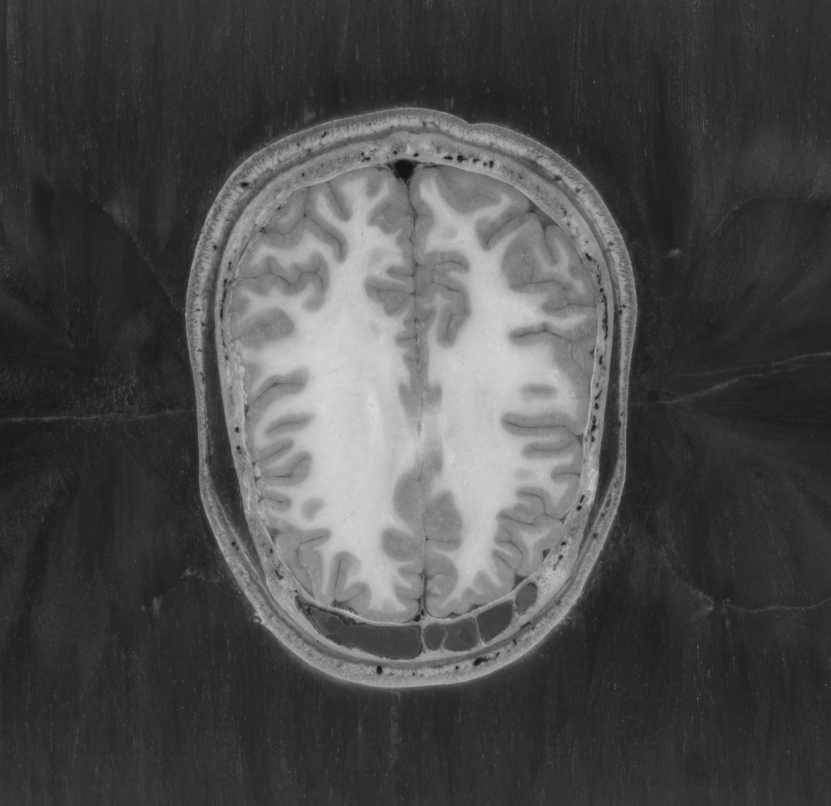

white space of the brain:
tpye: average
count of steps:  51378


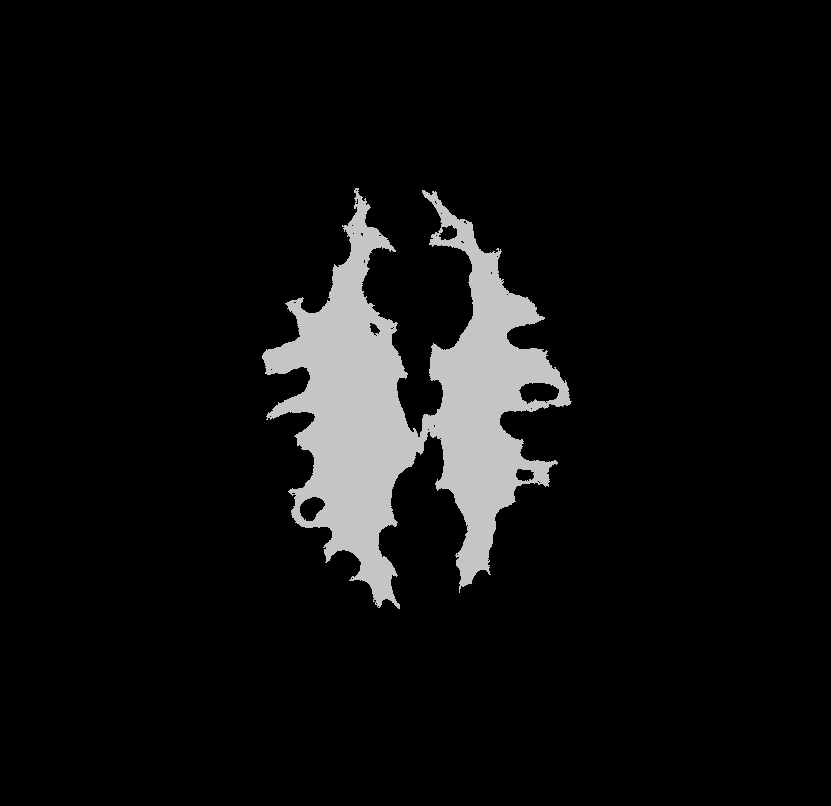

white space of the brain:
tpye: constant
count of steps:  45817


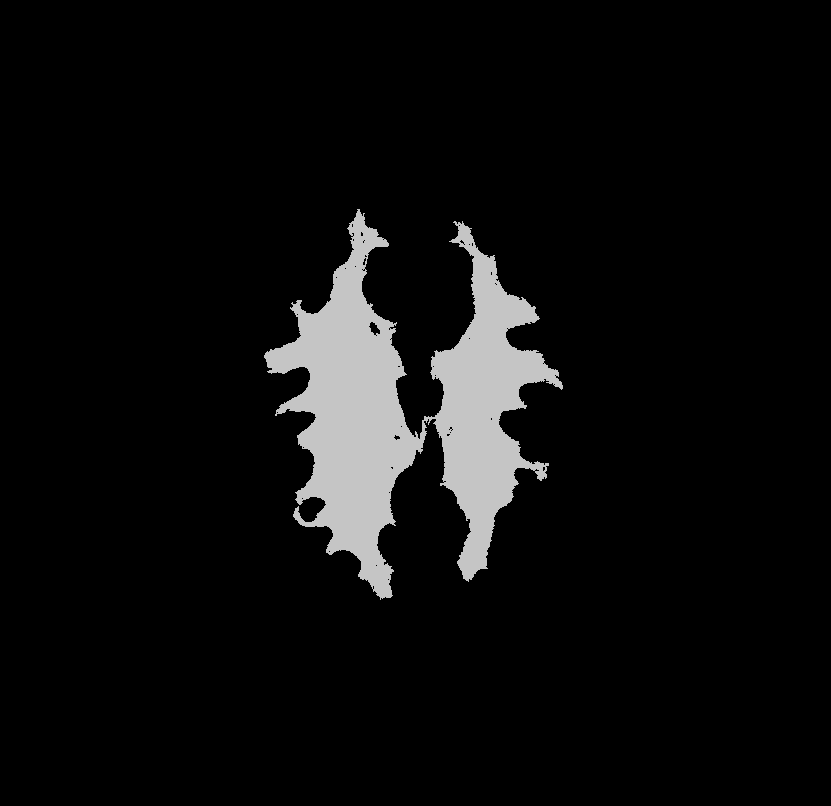

gray space of the brain:
tpye: average
count of steps:  136316


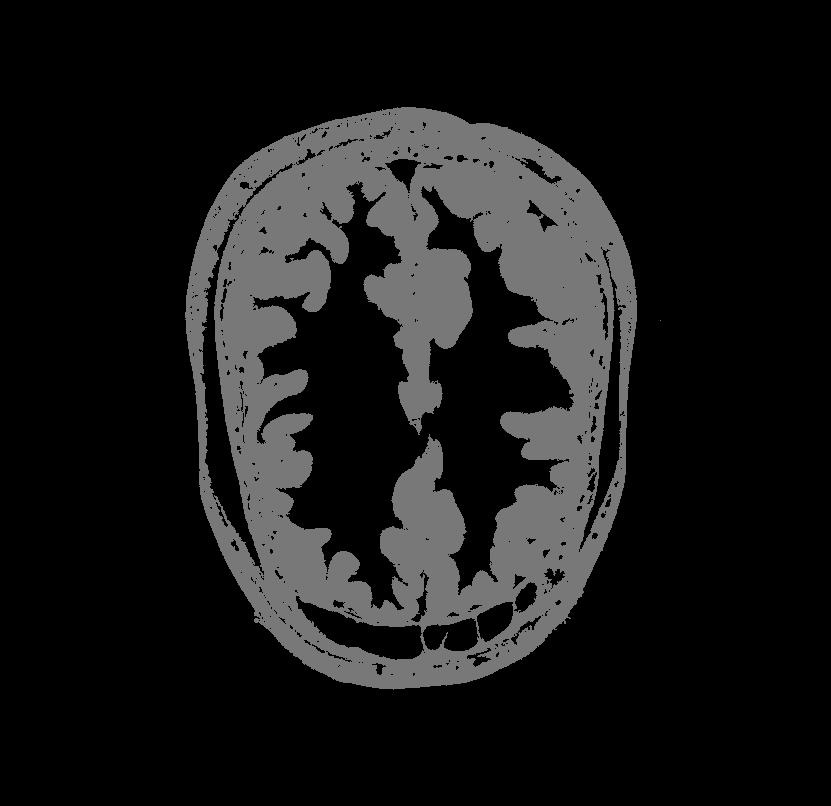

gray space of the brain:
tpye: constant
count of steps:  106949


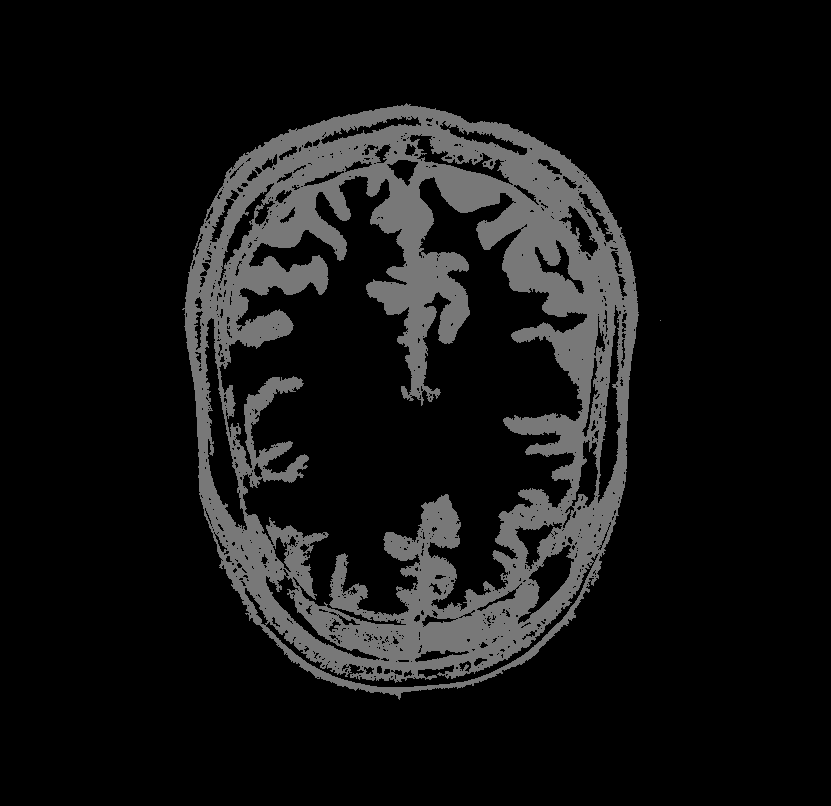

merge picture
tpye: average


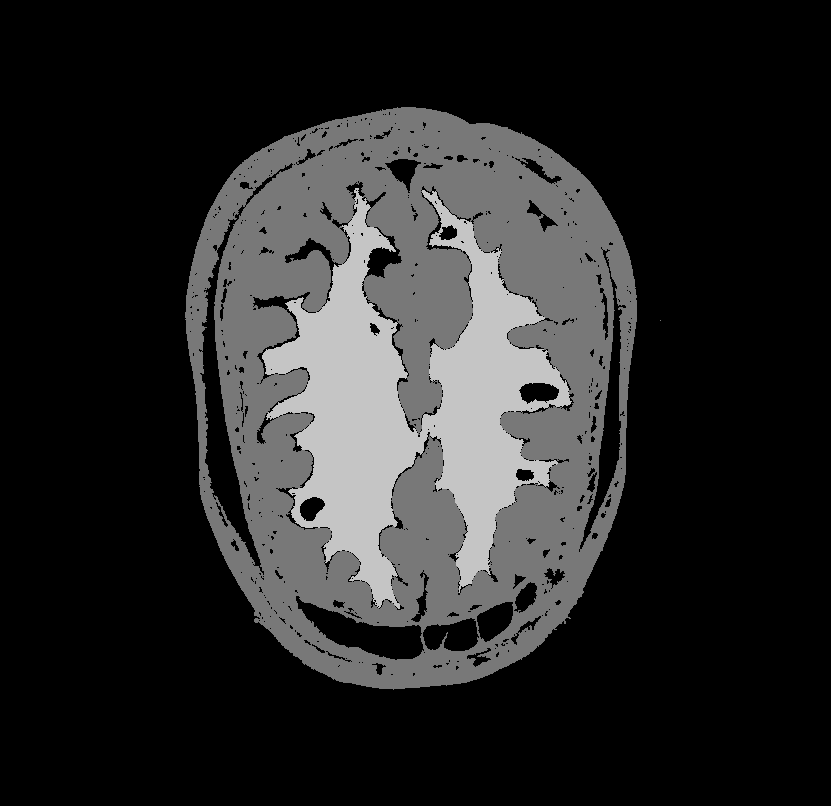

merge picture
tpye: conatant


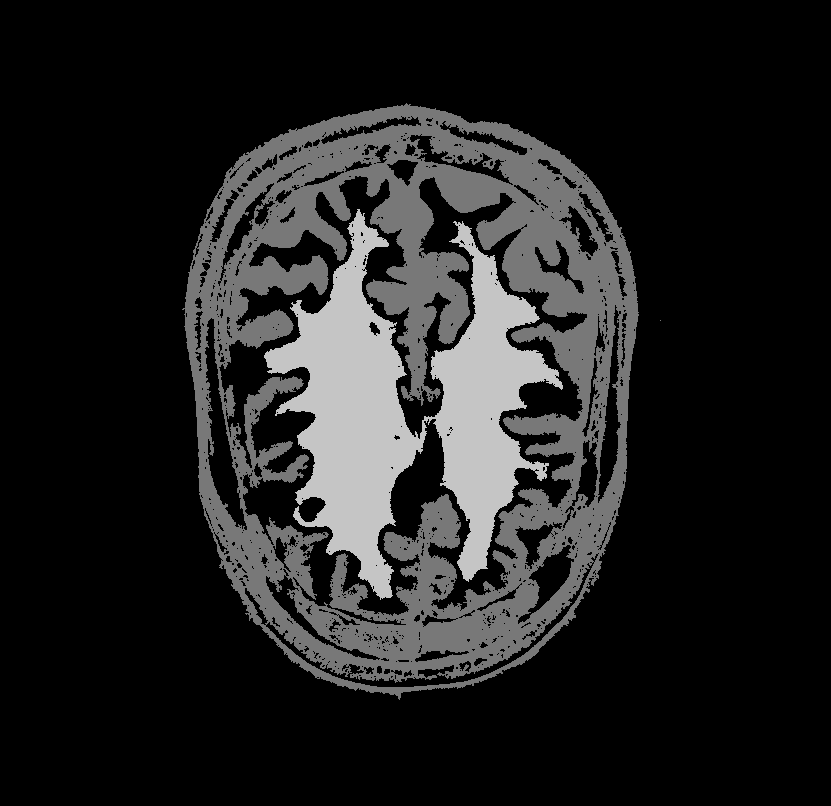

In [16]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

image_path = '/content/Color_MRI.png'
original_image = cv2.imread(image_path)

gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

white1 = (350, 350)
white2 = (470, 350)
cv2.circle(original_image, white1, 5, (255, 255, 255), 2)
cv2.circle(original_image, white2, 5, (255, 255, 255), 2)


gray1 = (320, 660)
gray2 = (430, 510)
gray3 = (230, 410)
cv2.circle(original_image, gray1, 5, (0, 0, 0), 2)
cv2.circle(original_image, gray2, 5, (0, 0, 0), 2)
cv2.circle(original_image, gray3, 5, (0, 0, 0), 2)




threshold_value = 20
region_label = 197



difference_type = "average"
seeds = [white1, white2]
white_img, step1 = region_growing(gray_image, seeds, threshold_value, difference_type, region_label)


difference_type = "constant"
white_img2, step12 = region_growing(gray_image, seeds, threshold_value, difference_type, region_label)


threshold_value = 40
region_label = 120


difference_type = "average"
seeds = [gray1, gray2, gray3]
gray_img, step2 = region_growing(gray_image, seeds, threshold_value, difference_type, region_label)


difference_type = "constant"
gray_img2, step22 = region_growing(gray_image, seeds, threshold_value, difference_type, region_label)




cv2_imshow(original_image)
cv2_imshow(gray_image)


print("white space of the brain:")
print("tpye: average")
print("count of steps: ", step1)
cv2_imshow(white_img)


print("white space of the brain:")
print("tpye: constant")
print("count of steps: ", step12)
cv2_imshow(white_img2)


print("gray space of the brain:")
print("tpye: average")
print("count of steps: ", step2)
cv2_imshow(gray_img)


print("gray space of the brain:")
print("tpye: constant")
print("count of steps: ", step22)
cv2_imshow(gray_img2)



print("merge picture")
print("tpye: average")
m_r =np.maximum(white_img, gray_img)
cv2_imshow(m_r)



print("merge picture")
print("tpye: conatant")
m_r =np.maximum(white_img2, gray_img2)
cv2_imshow(m_r)

for average type:
count of steps for white space of brain = 51381

count of steps for gray space of brain = 136316

for constant type:
count of steps for white space of brain = 45817

count of steps for gray space of brain = 106949


 در روش میانگین تعداد مراحل کار  بیشتر از روش ثابت است.
 همان طور که در عکس هم قابل مشاهده است در روش میانگین قسمت های بیشتری پوشش داده می شود اما حساسیت کمتری دارد.
در روش ثابت قسمت های کمتری پوشش داده شده و حساسیت بیشتر است.

<hr>
<font face="B Mitra" size=5>
<div dir=rtl>

<font size=6>
<b>تمرین دوم </b>
</font>

<br>
<p align="justify">
<font size=4>
<p>  در این تمرین قصد داریم سه روش مختلف interpolation یعنی nearest neighborhood , bilinear, bicubic را باهمدیگر مقایسه کنیم.
</p>

<p>
<font size=4>

</font>
</p>

</div>
</font>

<hr>
<font face="B Mitra" size=5>
<div dir=rtl>
کتابخانه های پیشنهادی:


In [17]:
pip install pydicom

In [12]:
# pydicom
from pydicom import dcmread
import cv2

<hr>
<font face="B Mitra" size=5>
<div dir=rtl>

<br>
<p align="justify">
<font size=4>

<font size=4>
</font>
<p>
1.2 از فایل file1.dcm تصویر را بخوانید. (قرار داده شده در فایل زیپ)
</p>



<font size=4>
<p>
۲.2 تعداد بیت های اختصاص داده (برای هر پیکسل)، تعداد بیت های ذخیره شده (برای هر پیکسل) و دسته بندی روش تصویر برداری و بخشی از بدن که از آن تصویر برداری شده است را استخراج و در خروجی چاپ کنید.
</p>
</font>


<font size=4>

<p>
۳.2 با نمونه کاهی (downsample) تعداد پیکسل هارا در جهت محور x به 1/4 و در جهت محور y به 1/2 کاهش دهید.
</p>


<font size=4>

<p>
۴.2 به کمک کتابخانه OpenCv و با روش های نزدیک ترین همسایه، دوخطی و دومکعبی تصویر بخش پیش را به ابعاد اولیه
بازگردانید، نمایش دهید و در مورد تفاوت نتیجه ی هرکدام بحث کنید

</p>


<font size=4>
<p>
<h2>  ۵.2 (سوال امتیازی) </h2>





<p font="Mitra"> تصویر را به فرمت های tif . و bmp . ذخیره کنید
</p>
</p>
</b>

</div>
</font>

<hr>

<font face="B Mitra" size=4>
<div dir=rtl>
<p>
<h2> روند حل مسئله </h2>
ابتدا با کمک کتابخانه معرفی شده فرمت dcm را میخوانیم و اطلاعات آن را بیرون میکشیم. برای مراحل بعدی یعنی نمونه کاهی و درونیابی میتوانید از دستورات آماده کتابخانه cv2 استفاده کنید.

</div>
</font>

<div dir=rtl>
<font face="B Mitra" size=6>
لینک‌های مفید
</font>
<ul>
<li><a href="https://www.kaggle.com/code/micheldc55/how-to-read-dcm-dicom-data">نحوه خواندن فرمت .DCM</a></li>
</ul>
</div>


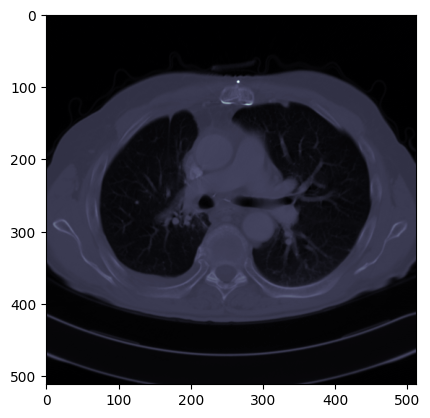

Imaging Method:  CT
Body Part Examined:  CHEST
Specific Bits:  12
Recorded Bits:  16


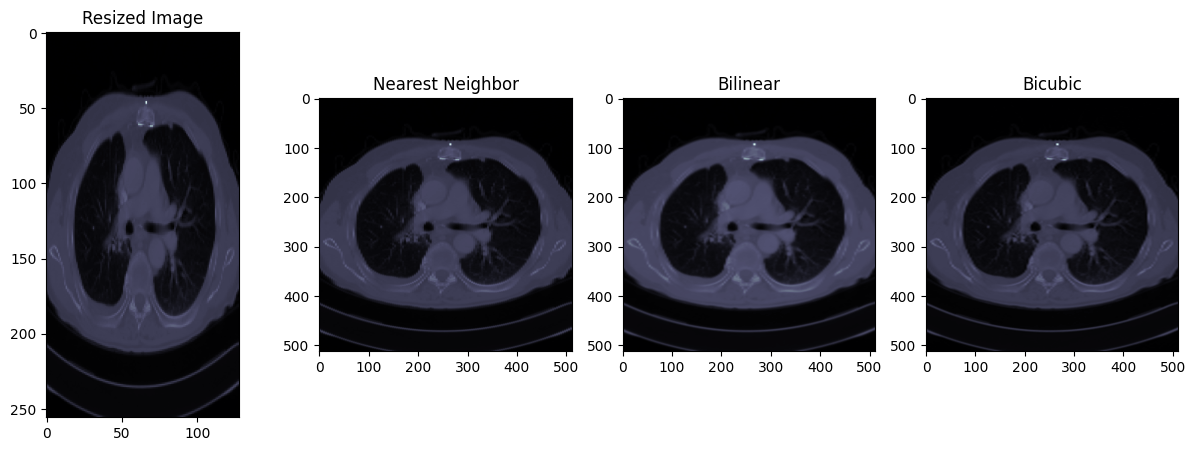

In [20]:
import matplotlib.pyplot as plt
import cv2

file_path = '/content/file1.dcm'
dicom = pydicom.dcmread(file_path)

# Display the DICOM image
plt.imshow(dicom.pixel_array, cmap=plt.cm.bone)
plt.show()


specific_b = dicom.BitsStored
recorded_b = dicom.BitsAllocated
img_method = dicom.Modality
body = dicom.BodyPartExamined


print("Imaging Method: ", img_method)
print("Body Part Examined: ", body)
print("Specific Bits: ", specific_b)
print("Recorded Bits: ", recorded_b)



resized_img = cv2.resize(dicom.pixel_array, (dicom.pixel_array.shape[1] // 4, dicom.pixel_array.shape[0] // 2))

nearest_n_img = cv2.resize(resized_img, (dicom.pixel_array.shape[1], dicom.pixel_array.shape[0]), interpolation=cv2.INTER_NEAREST)
cv2.imwrite('nearest_neighbor.tif', nearest_n_img)
cv2.imwrite('nearest_neighbor.bmp', nearest_n_img)

bilinear_img = cv2.resize(resized_img, (dicom.pixel_array.shape[1], dicom.pixel_array.shape[0]), interpolation=cv2.INTER_LINEAR)
cv2.imwrite('bilinear.tif', bilinear_img)
cv2.imwrite('bilinear.bmp', bilinear_img)

bicubic_img = cv2.resize(resized_img, (dicom.pixel_array.shape[1], dicom.pixel_array.shape[0]), interpolation=cv2.INTER_CUBIC)
cv2.imwrite('bicubic.tif', bicubic_img)
cv2.imwrite('bicubic.bmp', bicubic_img)


plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(resized_img, cmap=plt.cm.bone)
plt.title("Resized Image")

plt.subplot(1, 4, 2)
plt.imshow(nearest_n_img , cmap=plt.cm.bone)
plt.title("Nearest Neighbor")

plt.subplot(1, 4, 3)
plt.imshow(bilinear_img, cmap=plt.cm.bone)
plt.title("Bilinear")

plt.subplot(1, 4, 4)
plt.imshow(bicubic_img, cmap=plt.cm.bone)
plt.title("Bicubic")

plt.show()

همان طور که در تصویر مشخص است در روش اول پیکسل های تصاویر به وضوح مشخص هستند "خشن هستند" چون در روش نزدیک ترین همسایه، پیکسل نزدیک ترین انتخاب میشود.
در روش دوم که از میانگین وزن دار 4 پیکسل اطراف  محاسبه میشوند در نتیجه‌ تصویر نرم تری می دهند، همان طور که در عکس مشخص است نمیتوان پیکسل ها را از هم تمایز داد.
در روش سوم مشابه روش دوم از میانگین وزن دار 16 پیکسل اطراف اسفتاده میکند پس تصویر بسیار نرمتر است و در آن اصلا پیکسل ها قابل تمایز نیستند.
